# Statistics and Visualization in Python

### Overview:

**Visualization**
 -  **Matplotlib**           | https://matplotlib.org/gallery.html
 -  **Pandas**               | http://pandas.pydata.org/pandas-docs/stable/visualization.html
 -  **Seaborn**              | http://seaborn.pydata.org/
 
** Statistics**
 -  **Numpy**                | https://docs.scipy.org/doc/numpy/user/quickstart.html
 -  **SciPy**                | http://www.scipy-lectures.org/packages/index.html
 -  **Statsmodels**          | http://www.statsmodels.org/stable/examples/index.html

### Aim:
**Supply a one stop summary of useful statistical visualization tools in Python**

***

In [14]:
import numpy as np
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/pandas-dev/pandas/master/pandas/tests/data/tips.csv')
print(data.head())
numeric_col_list = ['total_bill', 'tip', 'size']
string_col_list = ['sex', 'smoker', 'day', 'time']

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


## Visualizing data

**Pandas:** http://pandas.pydata.org/pandas-docs/stable/visualization.html

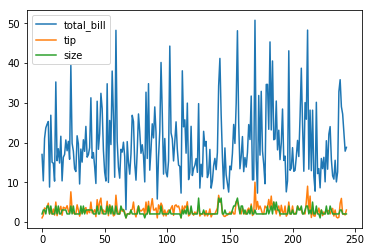

In [6]:
data.plot()

**Pairplot: scatter matrices**

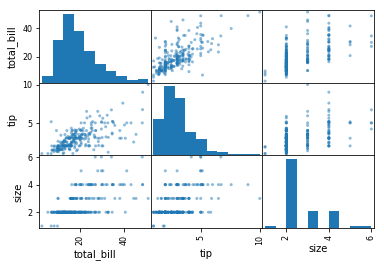

In [9]:
from pandas import plotting
_ = plotting.scatter_matrix(data[numeric_col_list])

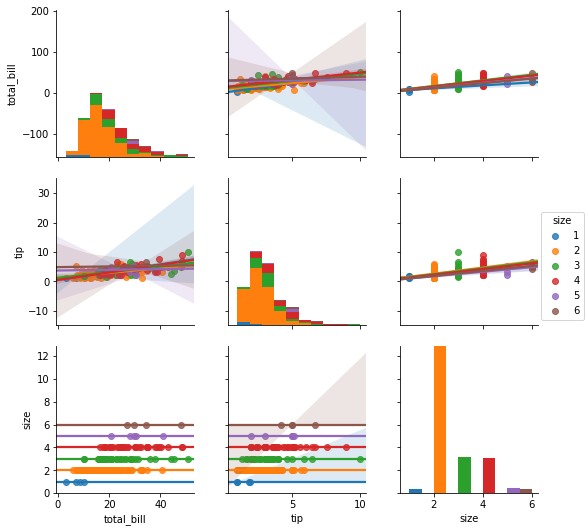

In [15]:
import seaborn
seaborn.pairplot(data, vars=numeric_col_list, kind='reg', hue='size')  

**lmplot: plotting a univariate regression**

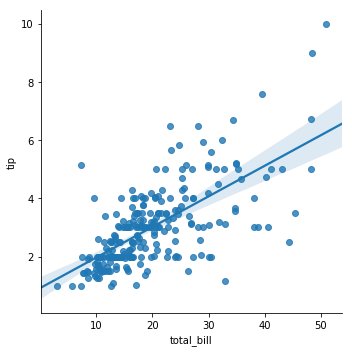

In [17]:
# https://seaborn.pydata.org/generated/seaborn.lmplot.html
seaborn.lmplot(y='tip', x='total_bill', data=data, legend=True)  

***

## Hypothesis Testing

### Hypothesis testing: comparing two groups

**SciPy:** http://www.scipy-lectures.org/packages/statistics/index.html

In [18]:
from scipy import stats

**1-sample t-test: testing the value of a population mean**

In [19]:
stats.ttest_1samp(data['total_bill'], 0)

Ttest_1sampResult(statistic=34.717142442302105, pvalue=3.5958034666889906e-96)

**2-sample t-test: testing for difference across populations**

In [20]:
stats.ttest_ind(data['total_bill'], data['tip'])   

Ttest_indResult(statistic=29.1067945590078, pvalue=1.4419939457083578e-108)

***

## Regressions and Models

**Statsmodels:** http://www.statsmodels.org/stable/example_formulas.html

### Ordinary Least Squares (OLS)

http://www.statsmodels.org/stable/examples/notebooks/generated/ols.html

In [26]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [37]:
data['x1'] = data['total_bill']
data['x2'] = data['size']
y = data['tip']
Xs = data[['x1', 'x2']]  # Define X's
Xs = sm.add_constant(Xs, prepend=False)  # Add Constant for intercept
model = ols('y ~ x1 + x2', Xs)  # Define Model. Linear, 2 Vars
results = model.fit()  # Fit

In [41]:
# Print parameters
print(results.summary())  
print()
print('Parameters: \n', results.params)
print()
print('R2: ', results.rsquared)
print()
print('Standard errors: \n', results.bse)
print()
print('Predicted values: \n', results.predict())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Thu, 07 Jun 2018   Prob (F-statistic):           9.67e-34
Time:                        16:41:37   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6689      0.194      3.455      0.0

**Post-hoc hypothesis testing: analysis of variance (ANOVA)**

In [47]:
print('F-Test: ', results.f_test([0, 1, -1])) 
print('F-Test: ', results.f_test("x1 = x2 = 0"))

F-Test:  <F test: F=array([[1.20317195]]), p=0.2737834286353202, df_denom=241, df_num=1>
F-Test:  <F test: F=array([[105.94813012]]), p=9.665094824055195e-34, df_denom=241, df_num=2>


**Visualize**

NameError: name 'y_true' is not defined

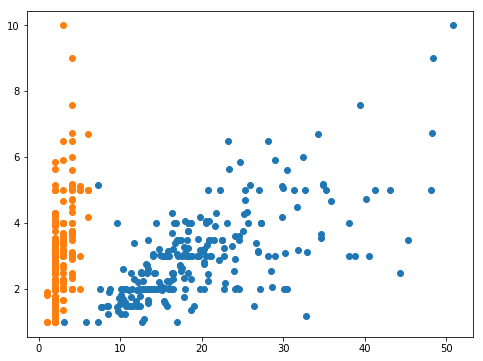

In [51]:
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
# Get Prediction
prstd, iv_l, iv_u = wls_prediction_std(results)
# Plot
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(data[['x1','x2']], y, 'o', label="Data")
ax.plot(data[['x1','x2']], y_true, 'b-', label="True")
ax.plot(data[['x1','x2']], res.fittedvalues, 'r--.', label="Predicted")
ax.plot(data[['x1','x2']], iv_u, 'r--')
ax.plot(data[['x1','x2']], iv_l, 'r--')
legend = ax.legend(loc="best")

### General Least Square (GLS)

http://www.statsmodels.org/stable/examples/notebooks/generated/gls.html

In [52]:
import statsmodels.api as sm

In [53]:
sigma = np.std(data.x1)
gls_model = sm.GLS(data.x1, data.y, sigma=sigma)
gls_results = gls_model.fit()

In [56]:
glsar_model = sm.GLSAR(data.x1, data.y, 1)  # lag=1
glsar_results = glsar_model.iterative_fit(1)
print(glsar_results.summary())
pd.DataFrame({
    'gls_params':gls_results.params,
    'glsar_params':glsar_results.params,
    'gls_bse':gls_results.bse,
    'glsar_bse':glsar_results.bse
})


                           GLSAR Regression Results                           
Dep. Variable:                     x1   R-squared:                       0.893
Model:                          GLSAR   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     2011.
Date:                Thu, 07 Jun 2018   Prob (F-statistic):          3.02e-119
Time:                        16:58:37   Log-Likelihood:                -821.56
No. Observations:                 243   AIC:                             1645.
Df Residuals:                     242   BIC:                             1649.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
y              6.2011      0.138     44.850      0.0

,gls_params,glsar_params,gls_bse,glsar_bse
y,6.205158,6.201083,0.138596,0.138264


### Recursive Least Square (RLS)

"Recursive least squares is an expanding window version of ordinary least squares. In addition to availability of regression coefficients computed recursively, the recursively computed residuals the construction of statistics to investigate parameter instability."

http://www.statsmodels.org/stable/examples/notebooks/generated/recursive_ls.html

In [63]:
model_rls = sm.RecursiveLS(data.x1, data.y)
results_rls = model_rls.fit()
print(results_rls.summary())

                           Statespace Model Results                           
Dep. Variable:                     x1   No. Observations:                  244
Model:                    RecursiveLS   Log Likelihood                -826.620
Date:                Thu, 07 Jun 2018   AIC                           1655.240
Time:                        17:00:38   BIC                           1658.733
Sample:                             0   HQIC                          1656.647
                                - 244                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
y              6.2052      0.139     44.771      0.000       5.934       6.477
Ljung-Box (Q):                       47.80   Jarque-Bera (JB):                72.68
Prob(Q):                              0.19   Pr

[16.82178134  9.09084396  6.73039553  6.90243422  6.87286167  6.33663301
  6.218706    6.52595598  6.58121568  6.34928481  6.33850168  6.48949894
  6.55760602  6.52883617  6.42243918  6.33095474  6.3283711   6.17208239
  6.08343134  6.08809983  5.9541462   6.00347476  6.02726633  5.85806942
  5.8710945   5.90324613  5.91365791  5.91932723  5.86933608  5.88779758
  5.89219497  5.91879519  5.89562883  5.93871125  5.92405738  5.95003251
  5.97307098  5.96205653  5.99062786  6.00620857  6.01975558  6.0324527
  6.00126582  6.00647957  5.96844785  5.97082458  5.89615565  5.86347372
  5.92500331  5.92642359  5.91636998  5.89325192  5.92936255  5.93115046
  5.92988425  5.92254752  6.01708345  6.05753604  6.0591086   6.13186721
  6.13463628  6.13899283  6.13583254  6.11105143  6.1163031   6.11975602
  6.12415959  6.12008393  6.1412366   6.14723491  6.14700199  6.14166495
  6.17213976  6.13749918  6.14083168  6.14519475  6.14141807  6.15400139
  6.16923524  6.17104891  6.17427183  6.15742354  6.

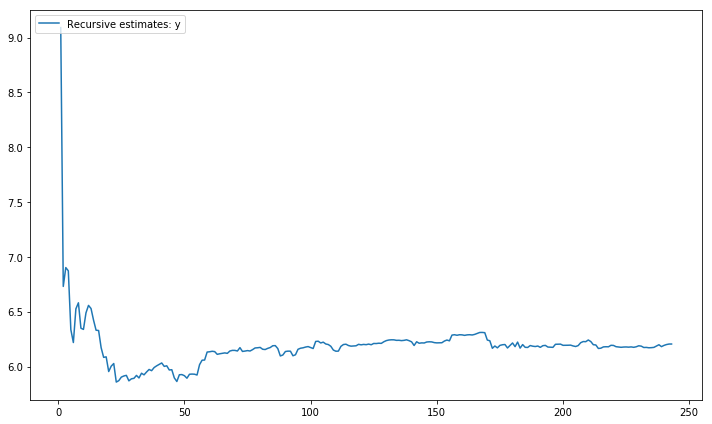

In [67]:
# Works on result
results_rls.plot_recursive_coefficient(range(model_rls.k_exog), alpha=None, figsize=(10,6))
print(results_rls.recursive_coefficients.filtered[0])

[-1.29443141 -2.03739677 -1.8843314  -1.92245179 -2.72682504 -3.26265719
 -2.27385798 -1.96309336 -2.82575692 -2.90761293 -2.45900908 -1.72571929
 -1.89550965 -2.56449506 -3.04770593 -3.08177023 -4.05787322 -4.69156126
 -4.65437537 -5.59483393 -5.04991356 -4.71630924 -5.50780724 -5.34204474
 -4.77075797 -4.55080827 -4.42943761 -4.94551894 -4.66027407 -4.51730525
 -4.00942862 -4.38634629 -3.5093142  -3.73809949 -3.35766643 -2.73638804
 -2.93328951 -2.24152489 -2.06062725 -1.69653128 -1.39152627 -2.02477165
 -1.77623902 -2.21923466 -2.16526559 -3.21825039 -3.62573164 -1.29366389
 -1.25643805 -1.57699641 -2.29395316 -1.7175292  -1.61997926 -1.64524829
 -1.83091005  1.01572673  3.47345951  3.5552259   4.58103632  4.66632834
  4.88391345  4.72358552  4.05315298  4.25848919  4.37294756  4.56113002
  4.12887842  5.24874297  5.55585861  5.54313757  5.35010822  6.41613185
  5.63813608  5.81145905  6.21242762  6.0706107   6.44011163  7.04556332
  7.12613421  7.25671182  6.64719513  6.47784235  6

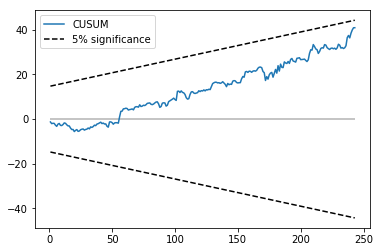

In [66]:
print(results_rls.cusum)
fig = results_rls.plot_cusum()

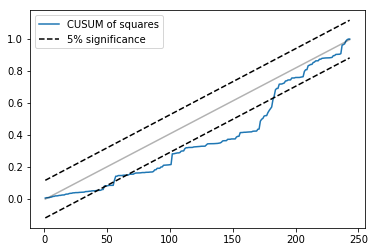

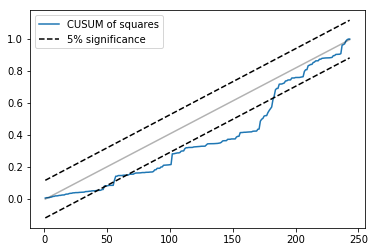

In [68]:
results_rls.plot_cusum_squares()

### Weighted Least Squares (WLS)

In [71]:
# Simply add weights to model
w = data.size
model_wls = sm.WLS(data.y, data.tip, weights=1./(w ** 2))
results_wls = model_wls.fit()

In [72]:
results_wls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.219e+33
Date:                Thu, 07 Jun 2018   Prob (F-statistic):               0.00
Time:                        17:03:05   Log-Likelihood:                 7986.7
No. Observations:                 244   AIC:                        -1.597e+04
Df Residuals:                     243   BIC:                        -1.597e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
tip            1.0000   2.86e-17   3.49e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                       72.197   Durbin-Watson:                   0.349
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.273
Skew:                           1.339   Prob(JB):                     5.87e-41
Kurtosis:                       6.324   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Regression Diagnostic

http://www.statsmodels.org/stable/examples/notebooks/generated/regression_diagnostics.html

Jarque-Bera test:

In [ ]:
sms.jarque_bera(results.resid)

Omni test:

In [ ]:
sms.omni_normtest(results.resid)

And many more...

### Linear Mixed Effects (LME)

In [ ]:
md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"], re_formula="~Time")
free = sm.regression.mixed_linear_model.MixedLMParams.from_components(np.ones(2), np.eye(2))
mdf = md.fit(free=free)
print(mdf.summary())

***

## Bayesian Statistics

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
mod = smf.ols(formula='Lottery ~ Literacy + Wealth + Region', data=df)
res = mod.fit()
print(res.summary())